In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/OR - 21.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.074314,0.006164,1
117952,-0.165684,0.421182,1
42613,0.305378,0.031024,1
43567,0.313094,0.113205,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.061725,0.001644,1
54412,-0.092588,0.109918,1
50632,-0.298475,-0.965636,1
89251,-0.242028,0.089989,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 16s 89us/step - loss: 0.1353 - accuracy: 0.5345 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0182 - accuracy: 0.8752 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0116 - accuracy: 0.9439 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0095 - accuracy: 0.9642 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0076 - accuracy: 0.9777 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0065 - accuracy: 0.9846 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [=====================

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.143616). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 27us/step - loss: 0.0041 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 13/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0039 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 14/100
174463/174463 [==============================] - 4s 24us/step - loss: 0.0037 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 15/100
  8000/174463 [>.............................] - ETA: 7s - loss: 0.0035 - accuracy: 0.9914

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.102725). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0035 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 16/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0033 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 17/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0031 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 18/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0030 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 19/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0030 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 20/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0029 - accuracy: 0.9907 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 21/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0028 - accuracy: 0.990

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.107712). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 27us/step - loss: 0.0026 - accuracy: 0.9907 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 35/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0026 - accuracy: 0.9907 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 36/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0026 - accuracy: 0.9907 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 37/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0026 - accuracy: 0.9907 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 38/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0026 - accuracy: 0.9907 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 39/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0026 - accuracy: 0.9907 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 40/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0026 - accuracy: 0.990

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.138629). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0025 - accuracy: 0.9906 - val_loss: 9.9938e-04 - val_accuracy: 1.0000
Epoch 49/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0025 - accuracy: 0.9906 - val_loss: 9.7334e-04 - val_accuracy: 1.0000
Epoch 50/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0025 - accuracy: 0.9906 - val_loss: 9.5183e-04 - val_accuracy: 1.0000
Epoch 51/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9906 - val_loss: 9.3699e-04 - val_accuracy: 1.0000
Epoch 52/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9906 - val_loss: 8.9110e-04 - val_accuracy: 1.0000
Epoch 53/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0025 - accuracy: 0.9907 - val_loss: 8.7831e-04 - val_accuracy: 1.0000
Epoch 54/100
174463/174463 [==============================] - 5s 27us/step - loss: 

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.113696). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 28us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 8.4759e-04 - val_accuracy: 1.0000
Epoch 74/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.9740e-04 - val_accuracy: 1.0000
Epoch 75/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.9147e-04 - val_accuracy: 1.0000
Epoch 76/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.9815e-04 - val_accuracy: 1.0000
Epoch 77/100
174463/174463 [==============================] - 5s 29us/step - loss: 0.0023 - accuracy: 0.9906 - val_loss: 8.2242e-04 - val_accuracy: 1.0000
Epoch 78/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.9067e-04 - val_accuracy: 1.0000
Epoch 79/100
174463/174463 [==============================] - 5s 26us/step - loss: 

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.122672). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 27us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.4967e-04 - val_accuracy: 1.0000
Epoch 81/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.8168e-04 - val_accuracy: 1.0000
Epoch 82/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.7564e-04 - val_accuracy: 1.0000
Epoch 83/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.9017e-04 - val_accuracy: 1.0000
Epoch 84/100
174463/174463 [==============================] - 4s 25us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.3243e-04 - val_accuracy: 1.0000
Epoch 85/100
174463/174463 [==============================] - 3s 19us/step - loss: 0.0023 - accuracy: 0.9907 - val_loss: 7.6021e-04 - val_accuracy: 1.0000
Epoch 86/100
174463/174463 [==============================] - 3s 17us/step - loss: 

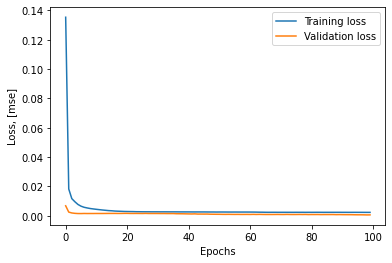

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

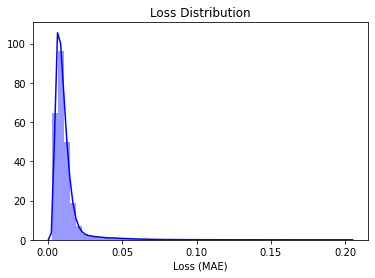

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.011457124368560084

Text(0, 0.5, 'Loss (MAE)')

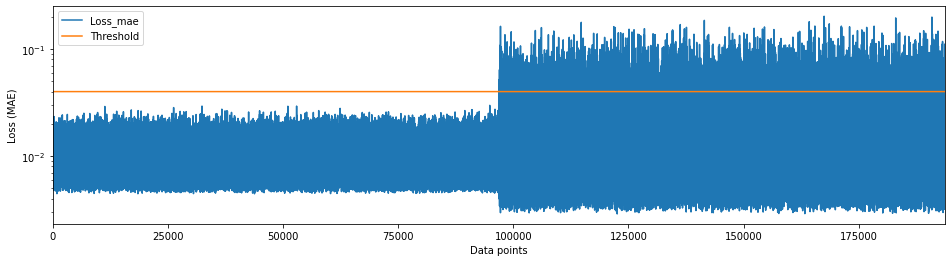

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.006394,0.04,False
1,0.010611,0.04,False
2,0.008868,0.04,False
3,0.005662,0.04,False
4,0.007856,0.04,False
...,...,...,...
193843,0.005583,0.04,False
193844,0.023536,0.04,False
193845,0.010920,0.04,False
193846,0.011147,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96949   0.051802       0.04     True
96962   0.051073       0.04     True
96992   0.048242       0.04     True
97006   0.064079       0.04     True
97015   0.056911       0.04     True
...          ...        ...      ...
193727  0.047548       0.04     True
193791  0.044501       0.04     True
193801  0.076202       0.04     True
193803  0.069758       0.04     True
193828  0.062991       0.04     True

[4427 rows x 3 columns]
(4427, 3)


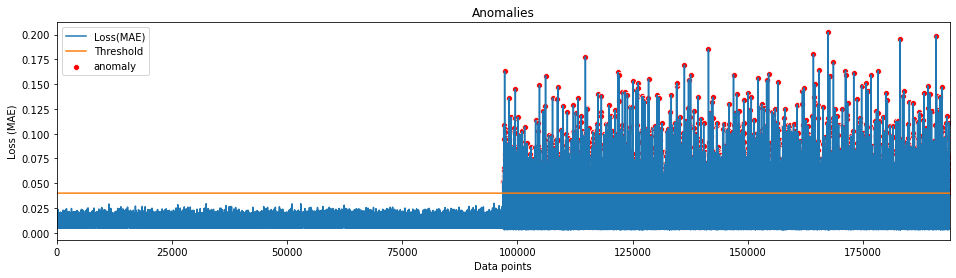

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 2s 36us/step


[0.0003308033450815992, 0.992158830165863]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

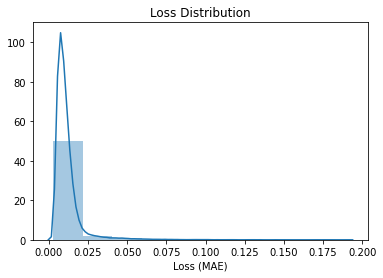

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.007117,0.04,False
1,0.008190,0.04,False
2,0.014637,0.04,False
3,0.011153,0.04,False
4,0.004835,0.04,False
...,...,...,...
48457,0.003286,0.04,False
48458,0.007193,0.04,False
48459,0.047478,0.04,True
48460,0.009164,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.01140825468553736

Text(0, 0.5, 'Loss (MAE)')

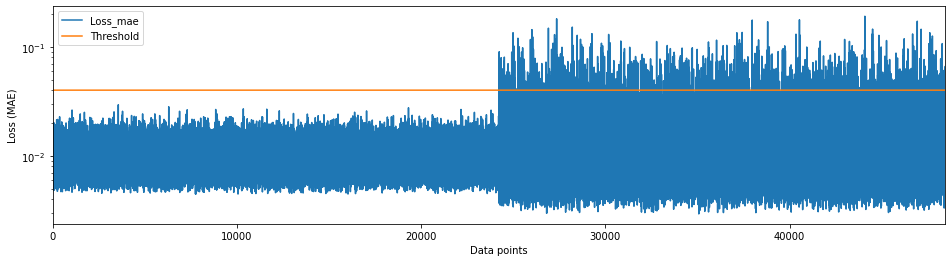

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [28]:
OR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(OR_anomalies)
print(OR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24239  0.090112       0.04     True
24284  0.054237       0.04     True
24306  0.077266       0.04     True
24315  0.046436       0.04     True
24332  0.062952       0.04     True
...         ...        ...      ...
48416  0.049011       0.04     True
48448  0.042860       0.04     True
48450  0.066268       0.04     True
48459  0.047478       0.04     True
48461  0.051227       0.04     True

[1053 rows x 3 columns]
(1053, 3)


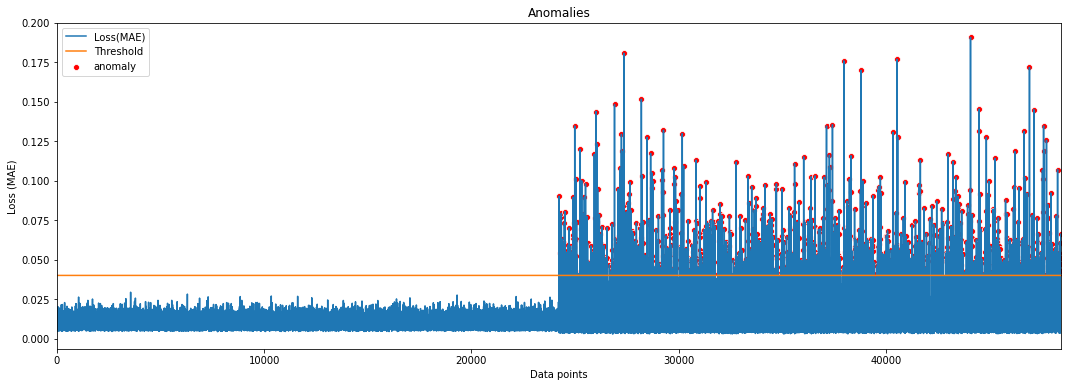

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=OR_anomalies.index , y=OR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [30]:
print(score[1])

0.992158830165863


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.22%


In [32]:
print("Anomalies: {}".format(OR_anomalies['Anomaly'].count()))

Anomalies: 1053


In [33]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [34]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.007117,0.04,False
1,0.008190,0.04,False
2,0.014637,0.04,False
3,0.011153,0.04,False
4,0.004835,0.04,False
...,...,...,...
24226,0.013234,0.04,False
24227,0.014529,0.04,False
24228,0.007911,0.04,False
24229,0.010244,0.04,False


In [35]:
OR_test = scored_test[scored_test.index >= x]
OR_test

,Loss_mae,Threshold,Anomaly
24231,0.029484,0.04,False
24232,0.031566,0.04,False
24233,0.005801,0.04,False
24234,0.005897,0.04,False
24235,0.014483,0.04,False
...,...,...,...
48457,0.003286,0.04,False
48458,0.007193,0.04,False
48459,0.047478,0.04,True
48460,0.009164,0.04,False


In [36]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

TN = OR_test[OR_test['Anomaly'] == False]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = normal_test[normal_test['Anomaly'] == True]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

FP = OR_test[OR_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

True Positives: 24231
True Negatives: 23178
False Negatives: 0
False Positives: 1053


In [37]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Precision: 95.84%
Recall: 100.000%
F1 Score: 97.87%
